In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# Reading Time Series

In [4]:
df1 = pd.read_csv('AirPassenger.csv')

In [5]:
df1.head()

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


In [6]:
df1.dtypes

Year-Month    object
Pax            int64
dtype: object

The column Year-Month is considered as an object. When importing the dataset we will either have to parse the column as a datetime type or add datetime column by reading the data and set it as index

In [7]:
df1 = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')

In [8]:
df1.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df1['1949-02-01':'1949-05-01']

,Pax
Year-Month,
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df1.loc['1949-02-01']

Pax    118
Name: 1949-02-01 00:00:00, dtype: int64

In [11]:
df2 = pd.read_csv('Gas.csv')

In [12]:
df2.head()

,Unnamed: 0,x
0,1,1709
1,2,1646
2,3,1794
3,4,1878
4,5,2173


Drop unwanted column and add date column and set it as index

In [13]:
df2.drop('Unnamed: 0',axis = 1,inplace = True)

In [14]:
df2.head()

,x
0,1709
1,1646
2,1794
3,1878
4,2173


In [15]:
date = pd.date_range(start = '1/1/1956', end = '1/1/1996', freq = 'M')
date

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=480, freq='M')

In [16]:
date = pd.DataFrame(date)
date

,0
0,1956-01-31
1,1956-02-29
2,1956-03-31
3,1956-04-30
4,1956-05-31
...,...
475,1995-08-31
476,1995-09-30
477,1995-10-31
478,1995-11-30


In [17]:
df2['Time_Stamp'] = pd.DataFrame(date)

In [18]:
df2.head()

,x,Time_Stamp
0,1709,1956-01-31
1,1646,1956-02-29
2,1794,1956-03-31
3,1878,1956-04-30
4,2173,1956-05-31


In [19]:
df2.set_index('Time_Stamp',inplace = True)

In [20]:
df2.head()

,x
Time_Stamp,
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173


In [21]:
df3 = pd.read_csv('RetailTurnover.csv')

In [22]:
df3.head()

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [23]:
quarters = pd.date_range(start = '9/30/1982', end = '3/31/1992', freq = 'Q')
quarters

DatetimeIndex(['1982-09-30', '1982-12-31', '1983-03-31', '1983-06-30',
               '1983-09-30', '1983-12-31', '1984-03-31', '1984-06-30',
               '1984-09-30', '1984-12-31', '1985-03-31', '1985-06-30',
               '1985-09-30', '1985-12-31', '1986-03-31', '1986-06-30',
               '1986-09-30', '1986-12-31', '1987-03-31', '1987-06-30',
               '1987-09-30', '1987-12-31', '1988-03-31', '1988-06-30',
               '1988-09-30', '1988-12-31', '1989-03-31', '1989-06-30',
               '1989-09-30', '1989-12-31', '1990-03-31', '1990-06-30',
               '1990-09-30', '1990-12-31', '1991-03-31', '1991-06-30',
               '1991-09-30', '1991-12-31', '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [24]:
df3['Time_Stamp'] = pd.DataFrame(quarters)

In [25]:
df3.head()

,Year,Quarter,Turnover,Time_Stamp
0,1982,Q3,13423.2,1982-09-30
1,1982,Q4,13128.8,1982-12-31
2,1983,Q1,15398.8,1983-03-31
3,1983,Q2,12964.2,1983-06-30
4,1983,Q3,13133.5,1983-09-30


In [26]:
df3 = df3.drop(['Year','Quarter'],axis = 1)

In [27]:
df3.head()

,Turnover,Time_Stamp
0,13423.2,1982-09-30
1,13128.8,1982-12-31
2,15398.8,1983-03-31
3,12964.2,1983-06-30
4,13133.5,1983-09-30


In [28]:
df3.set_index('Time_Stamp', inplace = True)

In [29]:
df3.head()

,Turnover
Time_Stamp,
1982-09-30,13423.2
1982-12-31,13128.8
1983-03-31,15398.8
1983-06-30,12964.2
1983-09-30,13133.5


In [30]:
df4 = pd.read_csv('daily_electricity_consumption.csv', parse_dates = ['date_time'])

In [31]:
df4.dtypes

date_time                datetime64[ns]
active_power_consumed           float64
meter_reading                   float64
dtype: object

In [32]:
df4.head()

,date_time,active_power_consumed,meter_reading
0,2009-01-01,0.976869,1.946528
1,2009-02-01,1.616326,8.222917
2,2009-03-01,1.328817,7.249306
3,2009-04-01,1.347218,2.253472
4,2009-05-01,1.113889,6.006944


In [33]:
df4.tail()

,date_time,active_power_consumed,meter_reading
690,2010-11-22,1.417733,7.038889
691,2010-11-23,1.095511,5.285417
692,2010-11-24,1.247394,8.488889
693,2010-11-25,0.993864,3.522222
694,2010-11-26,1.178230,7.908947


In [34]:
df4.set_index('date_time', inplace=True)

In [35]:
df4.head()

,active_power_consumed,meter_reading
date_time,,
2009-01-01,0.976869,1.946528
2009-02-01,1.616326,8.222917
2009-03-01,1.328817,7.249306
2009-04-01,1.347218,2.253472
2009-05-01,1.113889,6.006944


# Plotting Time Series

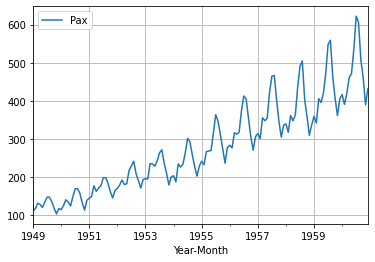

In [36]:
df1.plot(grid = True);

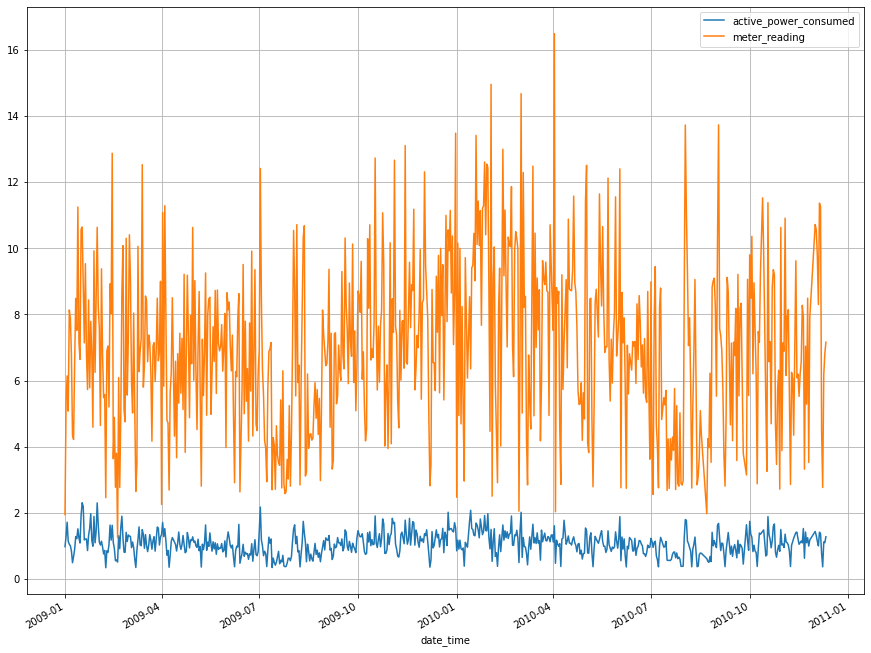

In [37]:
df4.plot(figsize = (15,12),grid = True);

# Handling Missing values

Missing data is not allowed in time series, as data is ordered.
It is simply not possible to shift the series to fill in the gaps.

In [38]:
df4 = pd.read_csv('Shoe Sales.csv', parse_dates = ['Month'], index_col = 'Month')

In [39]:
df4.head()

,No. of Pairs
Month,
2011-01-01,742
2011-02-01,741
2011-03-01,896
2011-04-01,951
2011-05-01,1030


Artificially adding null value to practise

In [40]:
df4.replace(932, np.NaN, inplace = True)

In [41]:
df4.isnull().sum()

No. of Pairs    1
dtype: int64

In [42]:
# imputaion using rolling mean
daily = df4.fillna(df4.rolling(6,min_periods = 1).mean())

# imputation using interpolation
df4_imputed = df4.interpolate(method = 'linear')

In [43]:
df4_imputed.isnull().sum()

No. of Pairs    0
dtype: int64

In [44]:
daily.isnull().sum()

No. of Pairs    0
dtype: int64

### Changing monthly data to quarterly

In [45]:
df1_q = df1.resample('Q').sum()

In [46]:
df1_q.head()

,Pax
Year-Month,
1949-03-31,362
1949-06-30,385
1949-09-30,432
1949-12-31,341
1950-03-31,382


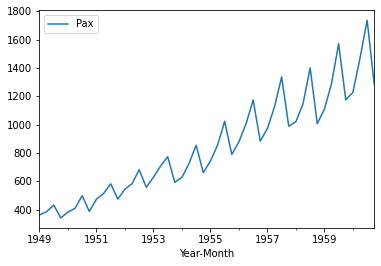

In [47]:
df1_q.plot()

# Decomposition of Time Series

##### Air Passenger data

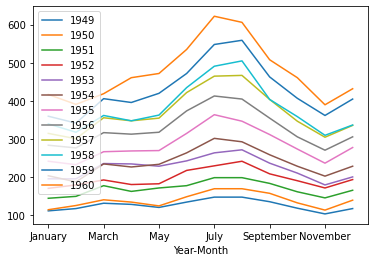

In [48]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
yearly_sales = pd.pivot_table(df1, values = 'Pax', columns = df1.index.year, index = df1.index.month_name())
yearly_sales = yearly_sales.reindex(index = months)
yearly_sales.plot()
plt.grid
plt.legend(loc = 'best')

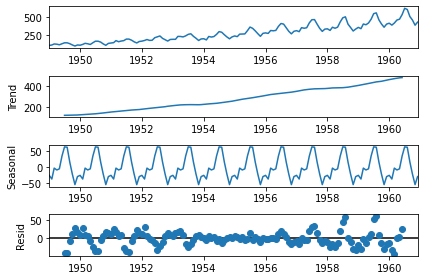

In [49]:
decomposition = seasonal_decompose(df1,model = 'additive')
decomposition.plot();

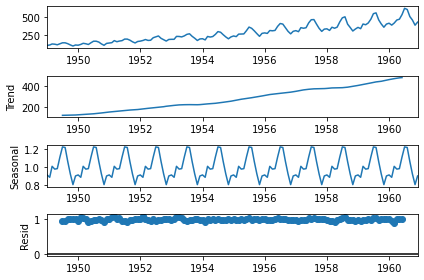

In [50]:
decomposition1 = seasonal_decompose(df1,model = 'multiplicative')
decomposition1.plot();

# Decomposition by Loess

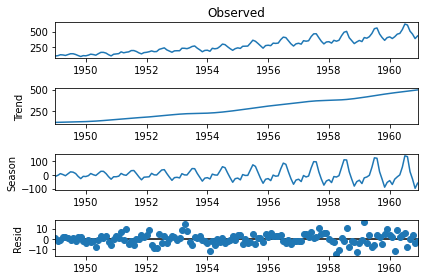

In [51]:
decomposition = STL(df1).fit()
decomposition.plot();

In [52]:
df5 = pd.read_csv('Stock.csv',parse_dates = ['TimeStamp'], index_col = 'TimeStamp', dayfirst = True)

In [53]:
df5

,Close
TimeStamp,
2017-05-01,64.57
2017-05-02,63.78
2017-05-03,62.20
2017-05-04,59.09
2017-05-05,61.67
...,...
2019-01-02,59.41
2019-01-03,59.28
2019-01-04,59.49


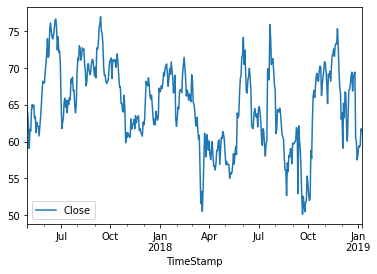

In [54]:
df5.plot()

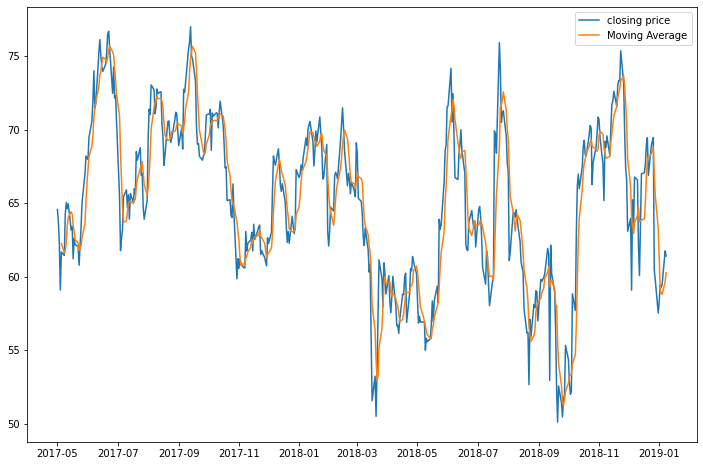

In [59]:
plt.figure(figsize = (12,8))
plt.plot(df5, label = 'closing price')
plt.plot(df5.rolling(5).mean(),label = 'Moving Average')
plt.legend(loc = 'best');

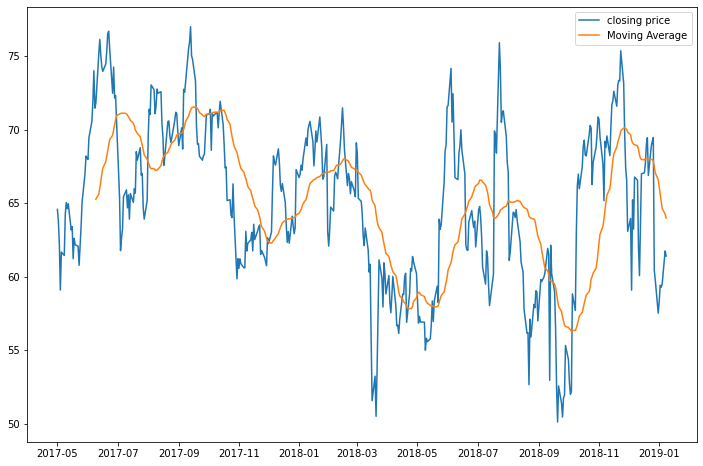

In [60]:
plt.figure(figsize = (12,8))
plt.plot(df5, label = 'closing price')
plt.plot(df5.rolling(30).mean(),label = 'Moving Average')
plt.legend(loc = 'best');